In [257]:
pip install pysoundfile

In [258]:
pip install spela

In [259]:
pip install SpeechRecognition

In [260]:
pip install pyaudioanalysis

In [0]:
import librosa
import soundfile
import os , glob , pickle
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score    
from spela.melspectrogram import Melspectrogram

import IPython.display as ipd  

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
        


importing liberaries finished

reading data 

In [262]:

ANAD_Data = pd.read_csv('/content/drive/My Drive/arabic-natural-audio-dataset/ANAD.csv', sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')
ANAD_Data

,name,Emotion,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr23,pcm_intensity_sma_iqr13,pcm_fftMag_mfcc_sma1_max,pcm_fftMag_mfcc_sma1_min,pcm_fftMag_mfcc_sma1_range,pcm_fftMag_mfcc_sma1_maxPos,pcm_fftMag_mfcc_sma1_minPos,pcm_fftMag_mfcc_sma1_amean,pcm_fftMag_mfcc_sma1_linregc1,pcm_fftMag_mfcc_sma1_linregc2,pcm_fftMag_mfcc_sma1_linregerrA,pcm_fftMag_mfcc_sma1_linregerrQ,pcm_fftMag_mfcc_sma1_stddev,pcm_fftMag_mfcc_sma1_skewness,pcm_fftMag_mfcc_sma1_kurtosis,pcm_fftMag_mfcc_sma1_quartile1,pcm_fftMag_mfcc_sma1_quartile2,pcm_fftMag_mfcc_sma1_quartile3,pcm_fftMag_mfcc_sma1_iqr12,pcm_fftMag_mfcc_sma1_iqr23,pcm_fftMag_mfcc_sma1_iqr13,pcm_fftMag_mfcc_sma2_min,pcm_fftMag_mfcc_sma2_range,pcm_fftMag_mfcc_sma2_maxPos,...,voiceProb_sma_de_quartile1,voiceProb_sma_de_quartile2,voiceProb_sma_de_quartile3,voiceProb_sma_de_iqr12,voiceProb_sma_de_iqr23,voiceProb_sma_de_iqr13,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_iqr12,F0_sma_de_iqr23,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr12,F0env_sma_de_iqr23,F0env_sma_de_iqr13
0,V2_1 (1).wav,surprised,0.000002,0,0.000002,39,0,0.0,0.0,0.000000,0.0,0.000000,1.417807,4.322336,0.0,0.000001,0.0,0.000001,1.055819,-45.65966,46.71548,40,75,-11.857210,-0.270896,0.333128,8.160779,118.95030,13.022510,-1.284218,3.584580,-13.470790,-9.038938,-1.020302,4.431851,8.018636,12.450490,-21.414460,47.29685,76,...,-0.007315,0.000000,0.024483,0.007315,0.024483,0.031798,66.745950,-57.106290,123.85220,2.399732,-0.002897,2.530077,10.716590,368.923300,19.20753,0.788902,7.182367,-1.435499,0.000000,1.435499,0.000000,33.08804,-2.265363,35.353400,27,88,2.446616,-0.053927,4.873343,3.983000,44.290160,6.804174,3.144908,12.621420,-0.208212,0.000000,1.819850,0.208212,1.819850,2.028063
1,V2_1 (2).wav,surprised,0.000002,0,0.000002,38,0,0.0,0.0,0.000000,0.0,0.000000,1.313596,3.697468,0.0,0.000001,0.0,0.000001,6.054396,-38.35849,44.41289,8,76,-10.741420,-0.257351,0.839360,7.954068,96.36932,11.919210,-0.809760,2.944028,-14.040660,-10.078480,-2.414511,3.962176,7.663968,11.626140,-19.797130,55.83598,75,...,-0.017062,0.000153,0.022161,0.017215,0.022008,0.039223,67.363600,-57.443100,124.80670,2.292438,-0.041496,4.159742,12.748730,407.780600,20.22297,0.285302,5.289831,-1.469311,-0.034900,1.434411,5.348474,20.55317,-2.803198,23.356370,3,88,2.416934,-0.099954,6.914886,2.768344,15.284100,4.709333,2.091973,7.180433,-0.068987,0.610156,2.934069,0.679144,2.323913,3.003057
2,V2_1 (3).wav,surprised,0.000002,0,0.000002,38,0,0.0,0.0,0.000000,0.0,0.000000,1.432917,4.121644,0.0,0.000000,0.0,0.000000,2.461585,-43.14096,45.60255,90,76,-13.240020,-0.183616,-4.977293,7.841158,119.78020,11.960080,-1.246133,3.555403,-14.834640,-10.482420,-6.096719,4.352217,4.385703,8.737920,-21.102710,45.24276,76,...,-0.019787,-0.000701,0.021939,0.019086,0.022640,0.041726,70.146710,-73.565880,143.71260,2.195976,-0.045190,4.229533,15.443790,661.259300,25.74235,0.299845,4.601072,-1.649715,0.000000,1.649715,2.298878,36.86413,-6.775864,43.639990,2,27,2.395509,-0.149378,9.117499,4.710866,46.801960,7.886595,2.563328,9.669317,-0.837921,0.000000,1.825973,0.837921,1.825973,2.663894
3,V2_1 (4).wav,surprised,0.000002,0,0.000002,38,0,0.0,0.0,0.000000,0.0,0.000000,1

In [263]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Exploring & Understnding Data

In [264]:
ANAD_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Columns: 846 entries, name to F0env_sma_de_iqr13
dtypes: float64(761), int64(83), object(2)
memory usage: 8.9+ MB


In [265]:
ANAD_Data.describe(include="all")

,name,Emotion,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr23,pcm_intensity_sma_iqr13,pcm_fftMag_mfcc_sma1_max,pcm_fftMag_mfcc_sma1_min,pcm_fftMag_mfcc_sma1_range,pcm_fftMag_mfcc_sma1_maxPos,pcm_fftMag_mfcc_sma1_minPos,pcm_fftMag_mfcc_sma1_amean,pcm_fftMag_mfcc_sma1_linregc1,pcm_fftMag_mfcc_sma1_linregc2,pcm_fftMag_mfcc_sma1_linregerrA,pcm_fftMag_mfcc_sma1_linregerrQ,pcm_fftMag_mfcc_sma1_stddev,pcm_fftMag_mfcc_sma1_skewness,pcm_fftMag_mfcc_sma1_kurtosis,pcm_fftMag_mfcc_sma1_quartile1,pcm_fftMag_mfcc_sma1_quartile2,pcm_fftMag_mfcc_sma1_quartile3,pcm_fftMag_mfcc_sma1_iqr12,pcm_fftMag_mfcc_sma1_iqr23,pcm_fftMag_mfcc_sma1_iqr13,pcm_fftMag_mfcc_sma2_min,pcm_fftMag_mfcc_sma2_range,pcm_fftMag_mfcc_sma2_maxPos,...,voiceProb_sma_de_quartile1,voiceProb_sma_de_quartile2,voiceProb_sma_de_quartile3,voiceProb_sma_de_iqr12,voiceProb_sma_de_iqr23,voiceProb_sma_de_iqr13,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_iqr12,F0_sma_de_iqr23,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr12,F0env_sma_de_iqr23,F0env_sma_de_iqr13
count,1383,1383,1.383000e+03,1383.0,1.383000e+03,1383.000000,1383.000000,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1383.000000,1383.000000,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,...,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
unique,1383,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,V5_1 (7).wav,angry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.132321e-06,0.0,2.131598e-06,39.416486,12.598698,2.104121e-07,7.230658e-10,1.200289e-07,9.255242e-08,3.347795e-07,1.457214,4.793619,2.169197e-08,6.471439e-07,1.13521

Checking For Null Values 

In [266]:
ANAD_Data.isnull().sum().any()

False

So There is no Missing Data 


Understanding data &  Visualizing   Emotion COlumn to Understand DAta MOre 

In [267]:
ANAD_Data["Emotion"].unique()

array(['surprised', 'angry', 'happy'], dtype=object)

In [268]:
ANAD_Data["Emotion"].value_counts()

angry        741
happy        505
surprised    137
Name: Emotion, dtype: int64

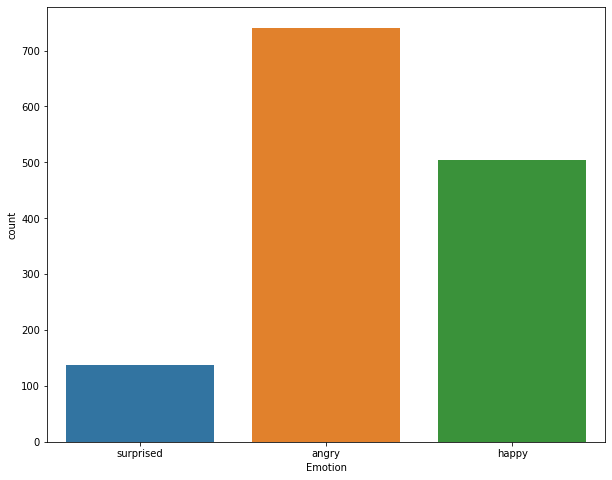

In [269]:
plt.figure(figsize = (10, 8))
sns.countplot(ANAD_Data["Emotion"])
plt.show()

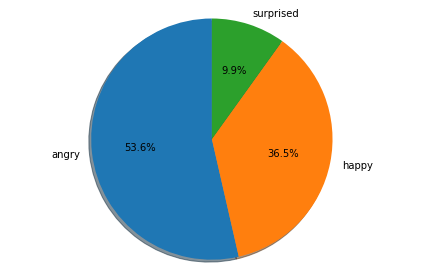

In [270]:
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(ANAD_Data.Emotion.value_counts().values, explode=None, 
        labels=ANAD_Data.Emotion.value_counts().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()


Loading of files name from data 

In [271]:
path1 ="/content/drive/My Drive/arabic-natural-audio-dataset/1sec_segmented_part1/1sec_segmented_part1"
dir_list1 = os.listdir(path1)

#dir_list1[:] # reading file names from the  first folder
path2='/content/drive/My Drive/arabic-natural-audio-dataset/1sec_segmented_part2/1sec_segmented_part2'
dir_list2=os.listdir(path2)
path3='/content/drive/My Drive/arabic-natural-audio-dataset/1sec_segmented_part3/1sec_segmented_part3'
dir_list3=os.listdir(path3)
dir_all=dir_list1+dir_list2+dir_list3
dir_all[:]

['V1_1 (1).wav',
 'V1_2 (2).wav',
 'V1_1 (2).wav',
 'V1_2 (1).wav',
 'V1_2 (10).wav',
 'V1_2 (6).wav',
 'V1_2 (7).wav',
 'V1_2 (3).wav',
 'V1_2 (5).wav',
 'V1_2 (4).wav',
 'V1_2 (8).wav',
 'V1_3 (2).wav',
 'V1_2 (9).wav',
 'V1_4 (1).wav',
 'V1_5 (11).wav',
 'V1_5 (1).wav',
 'V1_5 (10).wav',
 'V1_5 (12).wav',
 'V1_5 (15).wav',
 'V1_5 (16).wav',
 'V1_5 (14).wav',
 'V1_5 (13).wav',
 'V1_5 (19).wav',
 'V1_5 (2).wav',
 'V1_5 (18).wav',
 'V1_5 (21).wav',
 'V1_5 (17).wav',
 'V1_5 (20).wav',
 'V1_5 (3).wav',
 'V1_5 (8).wav',
 'V1_5 (7).wav',
 'V1_5 (6).wav',
 'V1_5 (4).wav',
 'V1_5 (5).wav',
 'V1_7 (10).wav',
 'V1_7 (1).wav',
 'V1_5 (9).wav',
 'V1_6 (2).wav',
 'V1_6 (1).wav',
 'V1_7 (11).wav',
 'V1_7 (14).wav',
 'V1_7 (13).wav',
 'V1_7 (12).wav',
 'V1_7 (15).wav',
 'V1_7 (16).wav',
 'V1_7 (18).wav',
 'V1_7 (17).wav',
 'V1_7 (19).wav',
 'V1_7 (2).wav',
 'V1_7 (21).wav',
 'V1_7 (20).wav',
 'V1_7 (22).wav',
 'V1_7 (25).wav',
 'V1_7 (26).wav',
 'V1_7 (23).wav',
 'V1_7 (24).wav',
 'V1_7 (3).wav',
 

Visualize Audio Files Features for all kinds of categories (happy,angry,surprised)

In [0]:
# loading a audio file of happy behavor 

happ, sr = librosa.load('/content/drive/My Drive/arabic-natural-audio-dataset/1sec_segmented_part1/1sec_segmented_part1/V1_1 (1).wav')

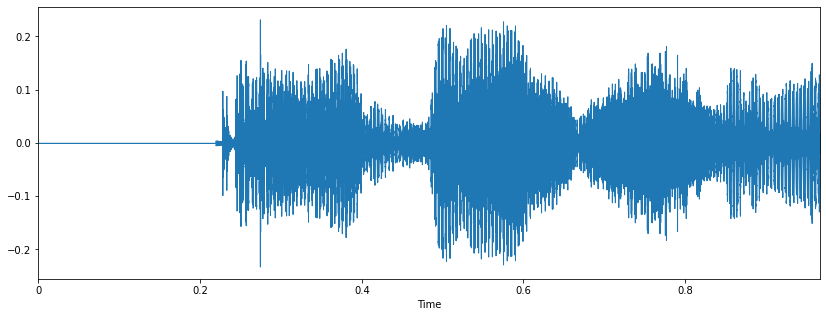

In [273]:
# wave plot for a happy audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(happ, sr=sr)

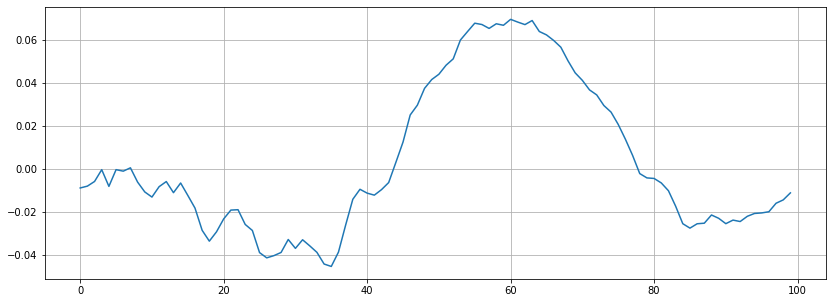

In [274]:
# Zooming in Waveplot Figure to be More Effective and recognized by eye (Happy)


n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))

plt.plot(happ[n0:n1])
plt.grid()

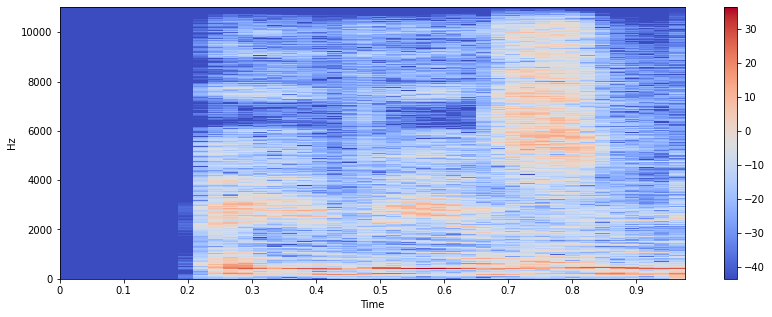

In [275]:
# spectrogram for a happy audio

X0 = librosa.stft(happ)
Xdb = librosa.amplitude_to_db(abs(X0))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

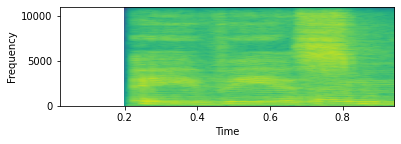

In [276]:
# another way to visualize spectrogram for happy 

plt.figure(1)

plot_b = plt.subplot(212)
plot_b.specgram( happ,NFFT=1024, Fs=sr, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.show()

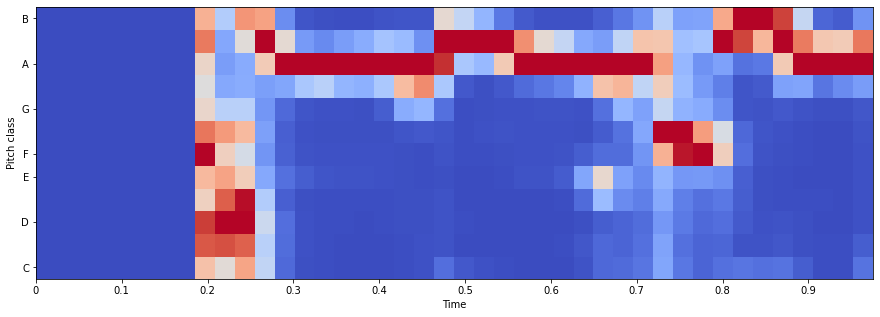

In [277]:
# Representing chroma feature for happy audio file:


chromagram = librosa.feature.chroma_stft(happ, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm') 

(20, 42)


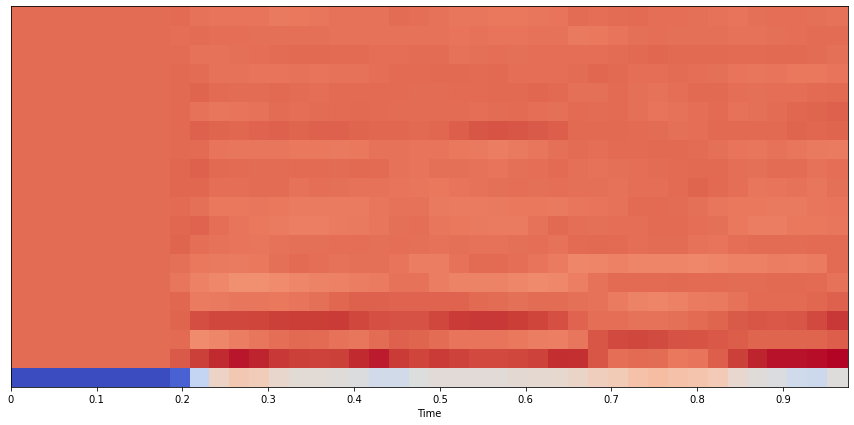

In [278]:
# Representing MFCCS feature for happy audio file:
mfccs = librosa.feature.mfcc(happ, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [0]:
# loading an audio file of surprised behavor 

surp,sr1=librosa.load ('/content/drive/My Drive/arabic-natural-audio-dataset/1sec_segmented_part1/1sec_segmented_part1/V2_1 (1).wav')

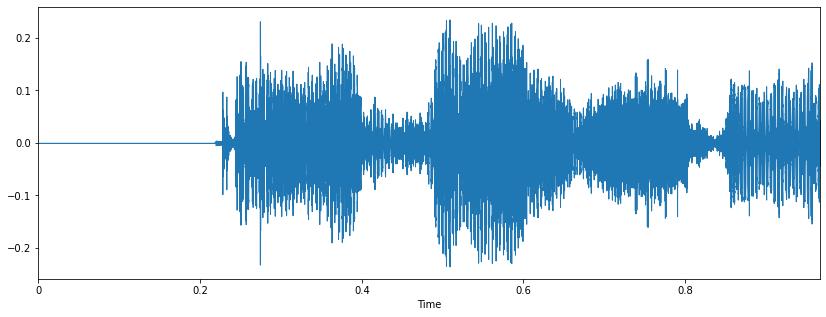

In [280]:
## wave plot for a surprised audio

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(surp, sr=sr1)


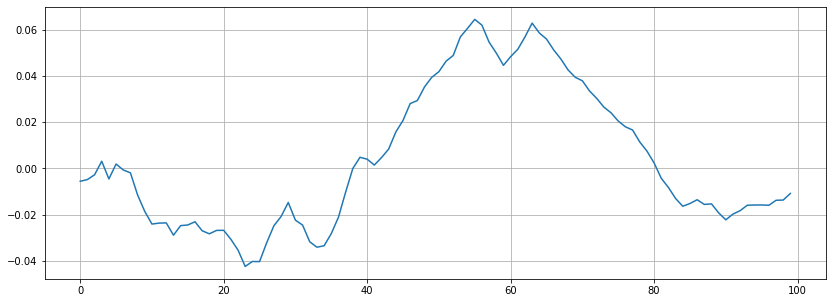

In [281]:
# Zooming in Waveplot Figure to be More Effective and recognized by eye (Surprised)


n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))

plt.plot(surp[n0:n1])
plt.grid()

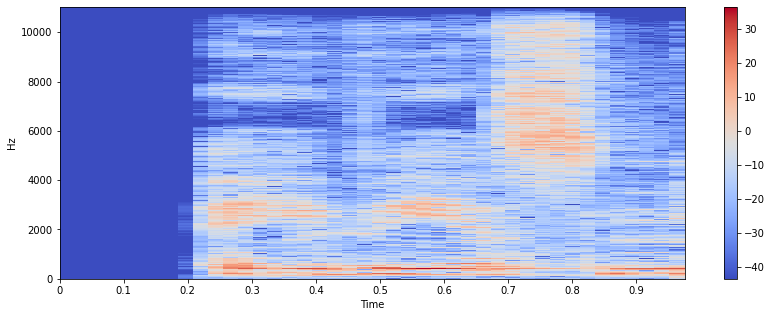

In [282]:
# # spectrogram for a surprised audio

X1 = librosa.stft(surp)
Xdb1 = librosa.amplitude_to_db(abs(X1))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb1, sr=sr1, x_axis='time', y_axis='hz')
plt.colorbar()

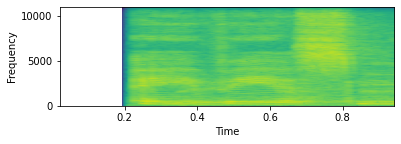

In [283]:
# anthor way to visualize spectrogram for suprised 

plt.figure(1)

plot_b = plt.subplot(212)
plot_b.specgram( surp,NFFT=1024, Fs=sr1, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.show()

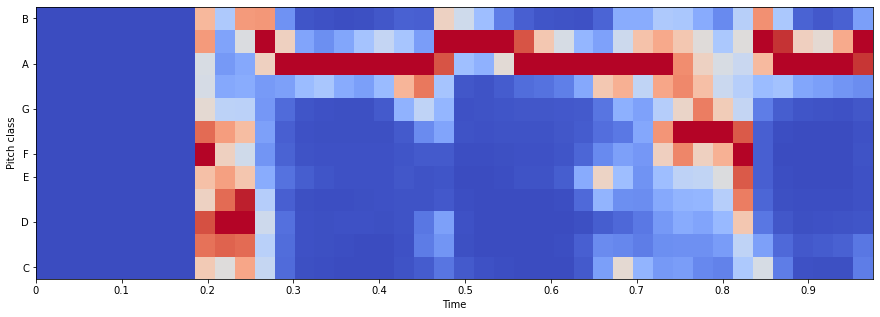

In [284]:
# Representing chroma feature for surprised audio file:


chromagram = librosa.feature.chroma_stft(surp, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm') 

(20, 42)


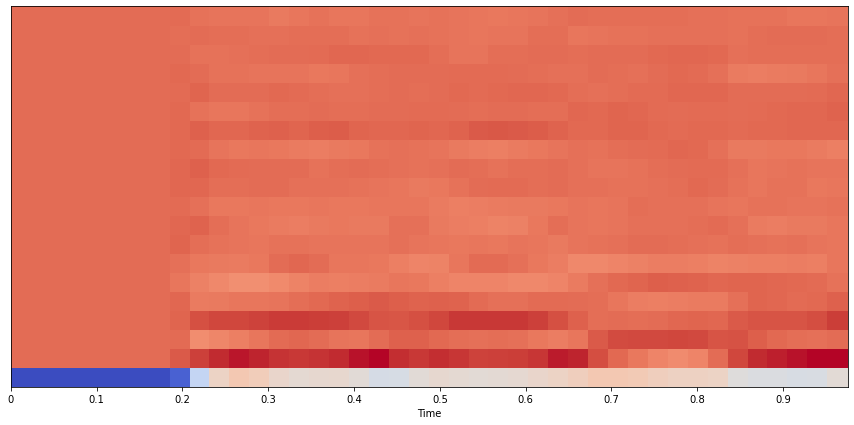

In [285]:
# Representing MFCCS feature for surprised audio file:
mfccs = librosa.feature.mfcc(surp, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [0]:
 # loading a audio file of angry behavor 
ang,sr2=librosa.load ('/content/drive/My Drive/arabic-natural-audio-dataset/1sec_segmented_part2/1sec_segmented_part2/V4-10 (1).wav')

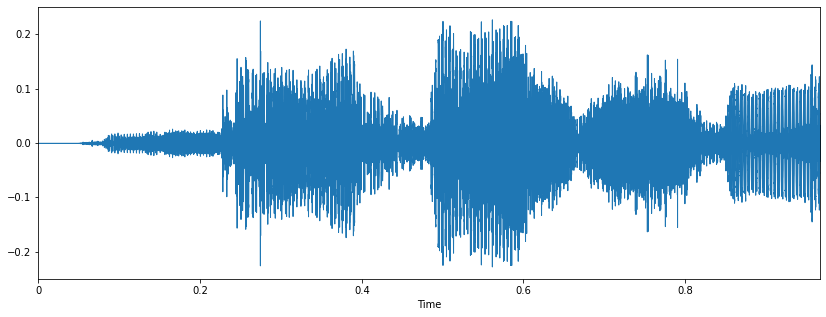

In [287]:
# wave plot for a angry audio

%matplotlib inline
import matplotlib.pyplot as plt

import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(ang, sr=sr2)


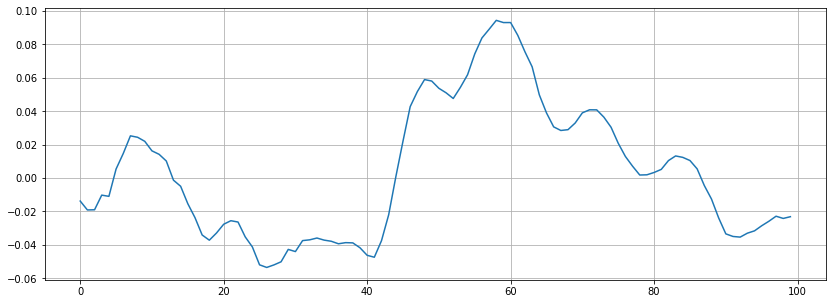

In [288]:
# Zooming in Waveplot Figure to be More Effective and recognized by eye (Angry)


n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))

plt.plot(ang[n0:n1])
plt.grid()

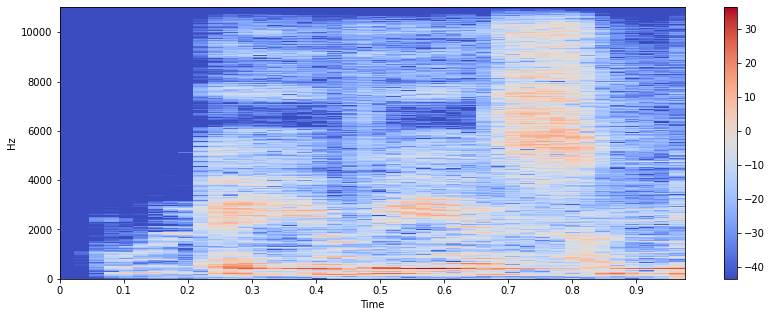

In [289]:
# spectrogram for a angry audio

X2 = librosa.stft(ang)
Xdb2= librosa.amplitude_to_db(abs(X2))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb2, sr=sr2, x_axis='time', y_axis='hz')
plt.colorbar()

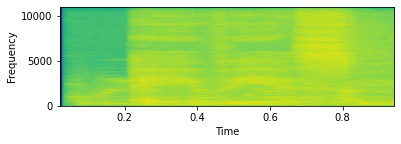

In [290]:
# another way to visualize Spectrogram for angry 
plt.figure(1)


plot_b = plt.subplot(212)
plot_b.specgram( ang,NFFT=1024, Fs=sr2, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.show()

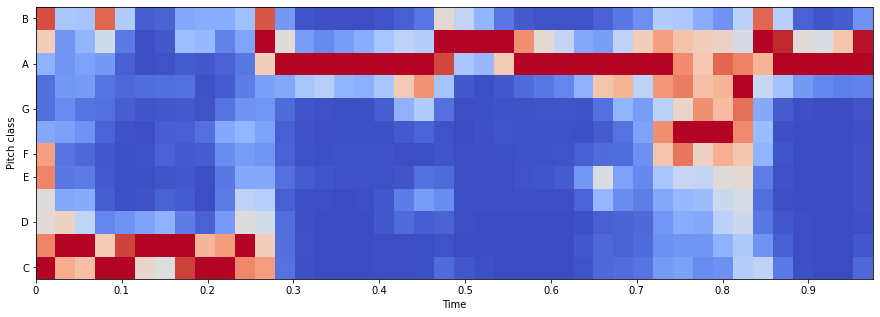

In [291]:
# Representing chroma feature for angry audio file:


chromagram = librosa.feature.chroma_stft(ang, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm') 

(20, 42)


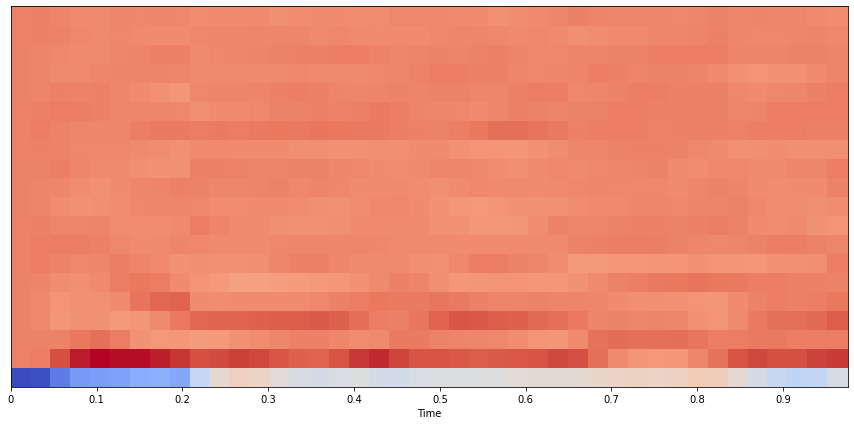

In [292]:
# Representing MFCCS feature for angry audio file:
mfccs = librosa.feature.mfcc(ang, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Copying Data  in which we need only to new DataFrame

In [0]:
ANAD=pd.DataFrame(ANAD_Data.iloc[:,[0,1]].copy())




In [0]:
ANAD.columns = [col.replace("'", "") for col in ANAD.columns]


In [295]:
ANAD

,name,Emotion
0,V2_1 (1).wav,surprised
1,V2_1 (2).wav,surprised
2,V2_1 (3).wav,surprised
3,V2_1 (4).wav,surprised
4,V2_1 (5).wav,surprised
...,...,...
1378,V8_86 (1).wav,happy
1379,V8_86 (2).wav,happy
1380,V8_86 (3).wav,happy
1381,V8_87 (1).wav,happy


In [0]:
#Reading Files name from Directory using glob

files= glob.glob("/content/drive/My Drive/arabic-natural-audio-dataset/audio files 1 ,  2 & 3/*.wav")

In [0]:
# Separte each file name which readed in last cell and append to a new list 

files_names=[]
for w in files:
  files_names.append(w.split("/")[-1])

In [0]:
# comparing names on the list with names on the csv file to put each emotion  with same arrange  in a  list 

emotion=[]
for i in files_names:
  try:
    emotion.append(ANAD[ANAD["name"]==i]["Emotion"].values[0])
  except:
    emotion.append(np.nan)

In [299]:
# Creating a new list contains file path of each audio file and it label 

final_data=pd.DataFrame([files,emotion]).T
final_data.columns=["file_Path","Emotion"]
final_data.head()

,file_Path,Emotion
0,/content/drive/My Drive/arabic-natural-audio-d...,NaN
1,/content/drive/My Drive/arabic-natural-audio-d...,happy
2,/content/drive/My Drive/arabic-natural-audio-d...,NaN
3,/content/drive/My Drive/arabic-natural-audio-d...,NaN
4,/content/drive/My Drive/arabic-natural-audio-d...,NaN


In [300]:
# Checking for missing values as there are 1420 file in the directory and only 1383 name on the original csv file 

final_data.isnull().sum()

file_Path     0
Emotion      86
dtype: int64

In [0]:
# handling Missing values by droping 

final_data.dropna(inplace=True)

In [302]:
# re-check for missing values 

final_data.isnull().sum()

file_Path    0
Emotion      0
dtype: int64

Applying Data Preprocessing by (LabelEncoding ) Categorical Values of csv which is 'Emotion' Column 

In [0]:
LE=LabelEncoder()
labels = LE.fit_transform(final_data['Emotion'])

Extracting Features For Audio Files which We Have 

In [0]:
def extract_feature(file_name, **kwargs):
    """
    Extract feature from audio file `file_name`
        Features supported:
            - MFCC (mfcc)
            - Chroma (chroma)
            - MEL Spectrogram Frequency (mel)
            - Contrast (contrast)
            - Tonnetz (tonnetz)
        e.g:
        `features = extract_feature(path, mel=True, mfcc=True)`
    """
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    X,sample_rate=librosa.load(file_name)
    if chroma or contrast:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result = np.hstack((result, mel))
    if contrast:
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, contrast))
    if tonnetz:
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
        result = np.hstack((result, tonnetz))
    return result

In [0]:
x=[]
for s in final_data["file_Path"].values:
  features_extracted = extract_feature(e, mfcc=True, chroma=True, mel=True)
  x.append(features_extracted)
  

Data Spliting 

In [0]:
y=labels

In [0]:
X_train, X_test, Y_train, Y_test=train_test_split(np.array(x),y, test_size=30, random_state=7)

Modeling MLP_Classifier from Nueral Networks  

In [0]:
classifier_Paramters = {
    'alpha': 0.001,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (512, 256, 128), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}



In [309]:
classifier = MLPClassifier(**classifier_Paramters)
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(512, 256, 128), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
Y_pred = classifier.predict(X_test)

In [312]:
# pickle the Model

filename = 'final_model.sav'
pickle.dump(classifier, open(filename, 'wb'))


loaded_model = pickle.load(open(filename, 'rb'))


loaded_model.predict(X_test) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])